Final Project Submission <br>
Student name: Qilun Chen<br>
Student pace: full time<br>
Scheduled project review date/time: April/1/2022<br>
Instructor name: Praveen Gowtham, Joe Comeaux<br>
Blog post URL:https://github.com/nkbuddy/dsc-phase-4-project-Image-Classification-with-Deep-Learning

### Table of Contents
* [STEP 1: Define the Problem](#Define-the-Problem)
* [Step 2: Gather the Data](#Gather-the-Data)
* [Step 3: Prepare Data for Consumption](#Prepare-Data-for-Consumption)
    * [3.1 Import Libraries](#Import-Libraries)
        * [3.11 Load Data Modelling Libraries](#Load-Data-Modelling-Libraries)
    * [3.2 Meet and Greet Data](#Meet-and-Greet-Data)
        * [3.21 The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting](#4C)
        * [3.22 Clean Data](#Clean-Data)
        * [3.23 Convert Formats](#Convert-Formats)
        * [3.24 Da-Double Check Cleaned Data](#Da-Double-Check-Cleaned-Data)
        * [3.25 Split Training and Testing Data](#Split-Training-and-Testing-Data)
* [Step 4: Perform Exploratory Analysis with Statistics](#Perform-Exploratory-Analysis-with-Statistics)
* [Step 5: Model Data](#Model-Data)
    * [5.1 Evaluate Model Performance](#Evaluate-Model-Performance)
        * [5.11 Model Performance with Cross-Validation (CV)](#CV)
        * [5.12 Tune Model with Hyper-Parameters](#Tune-Model-with-Hyper-Parameters)
        * [5.13 Tune Model with Feature Selection](#Tune-Model-with-Feature-Selection)
* [Step 6: Validate and Implement](#Validate-and-Implement)
* [STEP 7: Optimize and Strategize](#Optimize-and-Strategize)

# STEP 1: Define the Problem <a class="anchor" id="Define-the-Problem"></a>

Identifying whether or not they have pneumonia by Image-Based Deep Learning. Pneumonia is lungs with inflammatory, blackage of the bronchiole, and Alveoli with fluid. When interpreting the x-ray, the radiologist will look for white spots in the lungs (called infiltrates) that identify an infection.

# Step 2: Gather the Data <a class="anchor" id="Gather-the-Data"></a>

This dataset contains thousands of validated Chest X-Ray images  described. The images are split into a training set and a testing set of independent patients. Images are labeled as (disease)-(randomized patient ID)-(image number by this patient) and split into 2 directories: Pneumonia, and NORMAL. The dataset is from University of California San Diego, Guangzhou Women and Children's Medical Center. The three contributors are Daniel Kermany, Kang Zhang, Michael Goldbaum.

# Step 3: Prepare Data for Consumption <a class="anchor" id="Prepare-Data-for-Consumption"></a>

## 3.1 Import Libraries <a class="anchor" id="Import-Libraries"></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
!pip install pillow
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
from sklearn.metrics import confusion_matrix

## 3.11 Load Data Modelling Libraries <a class="anchor" id="Load-Data-Modelling-Libraries"></a>

In [7]:
# Directory path
train_data_dir = '/Users/alanch             an/Documents/Flatiron/dsc-phase-4-project-Image-Classification-with-Deep-Learning/data/chest_xray/train'
test_data_dir = '/Users/alanchan/Documents/Flatiron/dsc-phase-4-project-Image-Classification-with-Deep-Learning/data/chest_xray/test'

# Get all the data in the directory data/validation (132 images), and reshape them
test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(64, 64),batch_size = 132)

# Get all the data in the directory data/train (790 images), and reshape them
train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir, 
        target_size=(64, 64),batch_size = 790)

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

Found 624 images belonging to 2 classes.
Found 5232 images belonging to 2 classes.


In [8]:
len(test_images)

132

## 3.2 Meet and Greet Data <a class="anchor" id="Meet-and-Greet-Data"></a>

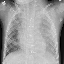

In [12]:
array_to_img(train_images[0])

In [13]:
train_images[0]

array([[[ 56.,  56.,  56.],
        [ 58.,  58.,  58.],
        [ 63.,  63.,  63.],
        ...,
        [103., 103., 103.],
        [ 82.,  82.,  82.],
        [104., 104., 104.]],

       [[ 58.,  58.,  58.],
        [ 74.,  74.,  74.],
        [ 79.,  79.,  79.],
        ...,
        [ 89.,  89.,  89.],
        [ 97.,  97.,  97.],
        [109., 109., 109.]],

       [[ 74.,  74.,  74.],
        [110., 110., 110.],
        [183., 183., 183.],
        ...,
        [114., 114., 114.],
        [112., 112., 112.],
        [117., 117., 117.]],

       ...,

       [[ 10.,  10.,  10.],
        [ 53.,  53.,  53.],
        [ 94.,  94.,  94.],
        ...,
        [ 14.,  14.,  14.],
        [ 18.,  18.,  18.],
        [ 40.,  40.,  40.]],

       [[ 10.,  10.,  10.],
        [ 61.,  61.,  61.],
        [158., 158., 158.],
        ...,
        [ 15.,  15.,  15.],
        [ 18.,  18.,  18.],
        [ 45.,  45.,  45.]],

       [[  7.,   7.,   7.],
        [ 63.,  63.,  63.],
        [139., 1

In [15]:
print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(test_images))
print(np.shape(test_labels))

(790, 64, 64, 3)
(790, 2)
(132, 64, 64, 3)
(132, 2)


In [16]:
train_img_unrow = train_images.reshape(790,-1).T
np.shape(train_img_unrow)

(12288, 790)

In [17]:
m = 132
test_img_unrow = test_images.reshape(m, -1).T
np.shape(test_img_unrow)

(12288, 132)

In [18]:
train_labels 

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [19]:
train_generator.class_indices 

{'NORMAL': 0, 'PNEUMONIA': 1}

In [20]:
train_labels_final = train_labels.T[[1]]
train_labels_final

array([[1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
        0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
        0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
        0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
        0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
        0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
        1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 

In [21]:
np.shape(train_labels_final) 

(1, 790)

In [22]:
test_labels_final = test_labels.T[[1]]
np.shape(test_labels_final)

(1, 132)

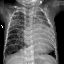

In [23]:
array_to_img(train_images[240])

In [24]:
train_labels_final[:,240]

array([1.], dtype=float32)

In [25]:
train_img_final = train_img_unrow/255
test_img_final = test_img_unrow/255

type(test_img_unrow)

numpy.ndarray

In [26]:
b = 0
def init_w(n):
    w = np.zeros((n,1))
    return w
w = init_w(64*64*3)
w

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [27]:
def propagation(w,b,x,y):
    l = x.shape[1]
    y_hat = 1/(1+np.exp(-(np.dot(w.T,x) + b)))
    cost = -(1/l) * np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
    dw = (1/l) * x * np.dot(x,(y_hat - y).T)
    db = (1/l) * np.sum(y_hat-y)
    return dw, db, cost
dw, db, cost = propagation(w,b,train_img_final,train_labels_final)
print(dw)

print(db)

print(cost)

[[-0.01266683 -0.0137978  -0.01108348 ... -0.01425019 -0.00588103
  -0.00610722]
 [-0.01266683 -0.0137978  -0.01108348 ... -0.01425019 -0.00588103
  -0.00610722]
 [-0.01266683 -0.0137978  -0.01108348 ... -0.01425019 -0.00588103
  -0.00610722]
 ...
 [-0.00616462 -0.00332889 -0.00382206 ... -0.00345219 -0.
  -0.        ]
 [-0.00616462 -0.00332889 -0.00382206 ... -0.00345219 -0.
  -0.        ]
 [-0.00616462 -0.00332889 -0.00382206 ... -0.00345219 -0.
  -0.        ]]
-0.22025316455696203
0.6931471805599452


In [28]:
def optimization(w, b, x, y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        dw, db, cost = propagation(w,b,x,y)
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Record the costs and print them every 50 iterations
        if i % 50 == 0:
            costs.append(cost)
        if print_cost and i % 50 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    return w, b, costs
w, b, costs = optimization(w, b, train_img_final, train_labels_final, 
                           num_iterations= 151, learning_rate = 0.0001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 50: 466.980962
Cost after iteration 100: 463.228383
Cost after iteration 150: 459.785701


In [29]:
def prediction(w, b, x):
    l = x.shape[1]
    y_prediction = np.zeros((1,l))
    w = w.reshape(x.shape[0], -1)
    y_hat = 1/(1+np.exp(-(np.dot(w.T,x) + b)))
    p = y_hat
    
    for i in range(y_hat.shape[1]):
        # Transform the probability into a binary classification using 0.5 as the cutoff
        if (y_hat[0,i]>0.5):
            y_prediction[0,i] = 1
        else:
            y_prediction[0,i] = 0
    return y_prediction

In [30]:
def model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):

    b = 0
    w = init_w(np.shape(x_train)[0]) 

    # Gradient descent (≈ 1 line of code)
    w, b, costs = optimization(w, b, x_train, y_train, num_iterations, learning_rate, print_cost)
    
    y_pred_test = prediction(w, b, x_test)
    y_pred_train = prediction(w, b, x_train)

    # Print train/test errors
    print('train accuracy: {} %'.format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100))
    print('test accuracy: {} %'.format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100))

    output = {'costs': costs, 
              'y_pred_test': y_pred_test,  
              'y_pred_train' : y_pred_train,  
              'w' : w, 
              'b' : b, 
              'learning_rate' : learning_rate, 
              'num_iterations': num_iterations}
    
    return output

In [31]:
output = model(train_img_final, train_labels_final, test_img_final, test_labels_final,
               num_iterations=1000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 50: 444.554360
Cost after iteration 100: 343.585840
Cost after iteration 150: 259.836130
Cost after iteration 200: 218.749406
Cost after iteration 250: 203.459279
Cost after iteration 300: 191.573915
Cost after iteration 350: 181.986557
Cost after iteration 400: 174.037728
Cost after iteration 450: 167.303890
Cost after iteration 500: 161.499786
Cost after iteration 550: 156.425664
Cost after iteration 600: 151.937048
Cost after iteration 650: 147.926555
Cost after iteration 700: 144.312502
Cost after iteration 750: 141.031506
Cost after iteration 800: 138.033525
Cost after iteration 850: 135.278452
Cost after iteration 900: 132.733708
Cost after iteration 950: 130.372521
train accuracy: 95.9493670886076 %
test accuracy: 88.63636363636364 %


In [32]:
train_img_final.shape[0]

12288

### 3.21 The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting <a class="anchor" id="4C"></a>

### 3.22 Clean Data <a class="anchor" id="Clean-Data"></a>

### 3.23 Convert Formats <a class="anchor" id="Convert-Formats"></a>

### 3.24 Da-Double Check Cleaned Data <a class="anchor" id="Da-Double-Check-Cleaned-Data"></a>

### 3.25 Split Training and Testing Data <a class="anchor" id="Split-Training-and-Testing-Data"></a>

# Step 4: Perform Exploratory Analysis with Statistics <a class="anchor" id="Perform-Exploratory-Analysis-with-Statistics"></a>

# Step 5: Model Data <a class="anchor" id="Model-Data"></a>

### 5.11 Model Performance with Cross-Validation (CV) <a class="anchor" id="CV"></a>

### 5.12 Tune Model with Hyper-Parameters <a class="anchor" id="Tune-Model-with-Hyper-Parameters"></a>

### 5.13 Tune Model with Feature Selection <a class="anchor" id="Tune-Model-with-Feature-Selection"></a>

# Step 6: Validate and Implement <a class="anchor" id="Validate-and-Implement"></a>

# Step 7: Optimize and Strategize<a class="anchor" id="Optimize-and-Strategize"></a>